<a href="https://colab.research.google.com/github/Hnsbtjra/Hnsbtjra/blob/main/SETELAH_DIPOTONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***MENGUNGGA FILE AUDIO DARI DRIVE***

In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found at the specified path:", folder_path)
else:
    # Get the list of files in the folder
    files_in_folder = os.listdir(folder_path)

    # Define the destination path in Google Colab
    destination_path = '/content/'

    # Upload audio files to Google Colab
    for file_name in files_in_folder:
        source_file_path = os.path.join(folder_path, file_name)
        destination_file_path = os.path.join(destination_path, file_name)
        shutil.copyfile(source_file_path, destination_file_path)
        print(f"File '{file_name}' successfully uploaded to Google Colab.")






In [3]:
#DURASI DARI MASING MASING FILE SUARA
import librosa
import os

# List all the audio files in the folder
audio_folder = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(audio_folder)

# Function to get the duration of an audio file
def get_audio_duration(audio_file):
    audio, sr = librosa.load(audio_file)
    duration = librosa.get_duration(y=audio, sr=sr)
    return duration

# Get the duration of each audio file
audio_durations = {}
for audio_file in audio_files:
    duration = get_audio_duration(os.path.join(audio_folder, audio_file))
    audio_durations[audio_file] = duration

# Print the duration of each audio file
for audio_file, duration in audio_durations.items():
    print(f"Audio file '{audio_file}' duration: {duration:.2f} seconds")


Audio file 'dog1.wav' duration: 3.00 seconds
Audio file 'dog2.wav' duration: 3.00 seconds
Audio file 'dog3.wav' duration: 3.00 seconds
Audio file 'dog4.wav' duration: 3.00 seconds
Audio file 'dog5.wav' duration: 3.00 seconds
Audio file 'dog6.wav' duration: 3.00 seconds
Audio file 'dog7.wav' duration: 3.00 seconds
Audio file 'dog8.wav' duration: 3.00 seconds
Audio file 'dog9.wav' duration: 3.00 seconds
Audio file 'dog10.wav' duration: 3.00 seconds
Audio file 'dog11.wav' duration: 3.00 seconds
Audio file 'dog12.wav' duration: 3.00 seconds
Audio file 'dog13.wav' duration: 3.00 seconds
Audio file 'dog14.wav' duration: 3.00 seconds
Audio file 'dog15.wav' duration: 3.00 seconds
Audio file 'dog16.wav' duration: 3.00 seconds
Audio file 'dog17.wav' duration: 3.00 seconds
Audio file 'dog18.wav' duration: 3.00 seconds
Audio file 'dog19.wav' duration: 3.00 seconds
Audio file 'dog20.wav' duration: 3.00 seconds
Audio file 'dog21.wav' duration: 3.00 seconds
Audio file 'dog22.wav' duration: 3.00 secon

## **proses pre emphasis**

In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Visualize waveform
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(audio, sr=sr)
        plt.title('Waveform Sebelum Pre-emphasis')
        plt.subplot(2, 1, 2)
        librosa.display.waveshow(pre_emphasized_audio, sr=sr)
        plt.title('Waveform Setelah Pre-emphasis')
        plt.tight_layout()
        plt.show()


nanti tampilkan nilai nilainya ya

## **FRAME BLOCKING**

In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames = frame_blocking(pre_emphasized_audio)

        # Visualize beberapa frame audio
        plt.figure(figsize=(10, 5))
        librosa.display.waveshow(pre_emphasized_audio, sr=sr, alpha=0.7)
        librosa.display.waveshow(frames, sr=sr, color='r', alpha=0.6)
        plt.legend(['Audio Pre-emphasis', 'Frame Audio'])
        plt.title('Waveform dan Frame Audio')
        plt.tight_layout()
        plt.show()


### **WINDOWING**

In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames = frame_blocking(pre_emphasized_audio)

        # Windowing
        windowed_frames = apply_window(frames)

        # Visualize beberapa frame audio yang telah di-window
        plt.figure(figsize=(12, 6))
        librosa.display.waveshow(pre_emphasized_audio, sr=sr, alpha=0.7)
        librosa.display.waveshow(windowed_frames, sr=sr, color='r', alpha=0.6)
        plt.legend(['Audio Pre-emphasis', 'Frame Audio dengan Window'])
        plt.title('Waveform dan Frame Audio dengan Window')
        plt.tight_layout()
        plt.show()




In [ ]:
#GABUNGAN DAN SAMBUNGAN DARI ATAS
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Function to perform Fast Fourier Transform (FFT)
def perform_fft(frames):
    return np.fft.fft(frames, axis=0)

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        hop_length = 512  # Define hop_length here
        frames = frame_blocking(pre_emphasized_audio, hop_length=hop_length)

        # Windowing
        windowed_frames = apply_window(frames)

        # Fast Fourier Transform (FFT)
        fft_result = perform_fft(windowed_frames)

        # Visualize beberapa frame audio yang telah di-window
        plt.figure(figsize=(12, 6))
        librosa.display.waveshow(pre_emphasized_audio, sr=sr, alpha=0.7)
        librosa.display.waveshow(windowed_frames, sr=sr, color='r', alpha=0.6)
        plt.legend(['Audio Pre-emphasis', 'Frame Audio dengan Window'])
        plt.title('Waveform dan Frame Audio dengan Window')
        plt.tight_layout()
        plt.show()

        # Visualize spektrum frekuensi dari beberapa frame audio setelah FFT
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(librosa.amplitude_to_db(np.abs(fft_result), ref=np.max),
                                 sr=sr,
                                 hop_length=hop_length,
                                 x_axis='time',
                                 y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spektrum Frekuensi Setelah FFT')
        plt.tight_layout()
        plt.show()




In [ ]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames, hop_length, frame_length  # Return hop_length and frame_length along with frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Function to perform Fast Fourier Transform (FFT)
def perform_fft(frames):
    return np.fft.fft(frames, axis=0)

# Function to perform Discrete Cosine Transform (DCT)
def perform_dct(log_power_spectrum, num_mfcc=13):
    return dct(log_power_spectrum, type=2, axis=0, norm='ortho')

# Function to perform cepstral liftering
def cepstral_liftering(mfcc, lifter_coeff=22):
    num_frames, num_coeffs = mfcc.shape
    n = np.arange(num_coeffs)
    lift = 1 + (lifter_coeff / 2) * np.sin(np.pi * n / lifter_coeff)
    return mfcc * lift

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames, hop_length, frame_length = frame_blocking(pre_emphasized_audio)

        # Windowing
        windowed_frames = apply_window(frames)

        # Fast Fourier Transform (FFT)
        fft_result = perform_fft(windowed_frames)

        # Power Spectrum
        power_spectrum = np.abs(fft_result)**2

        # Log Power Spectrum
        log_power_spectrum = np.log(power_spectrum)

        # Discrete Cosine Transform (DCT)
        num_mfcc = 13  # Number of MFCC coefficients
        mfcc = perform_dct(log_power_spectrum, num_mfcc=num_mfcc)

        # Cepstral Liftering
        lifter_coeff = 22  # Liftering coefficient
        mfcc_liftered = cepstral_liftering(mfcc, lifter_coeff=lifter_coeff)

        # Visualize spektrogram dari beberapa frame audio setelah Cepstral Liftering
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(librosa.amplitude_to_db(mfcc_liftered.T, ref=np.max),
                                 sr=sr,
                                 hop_length=hop_length,
                                 x_axis='time',
                                 y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title('MFCC setelah Cepstral Liftering')
        plt.tight_layout()
        plt.show()


### ***HASIL EKSTRASI CIRI DAN KLASIFIKASI***

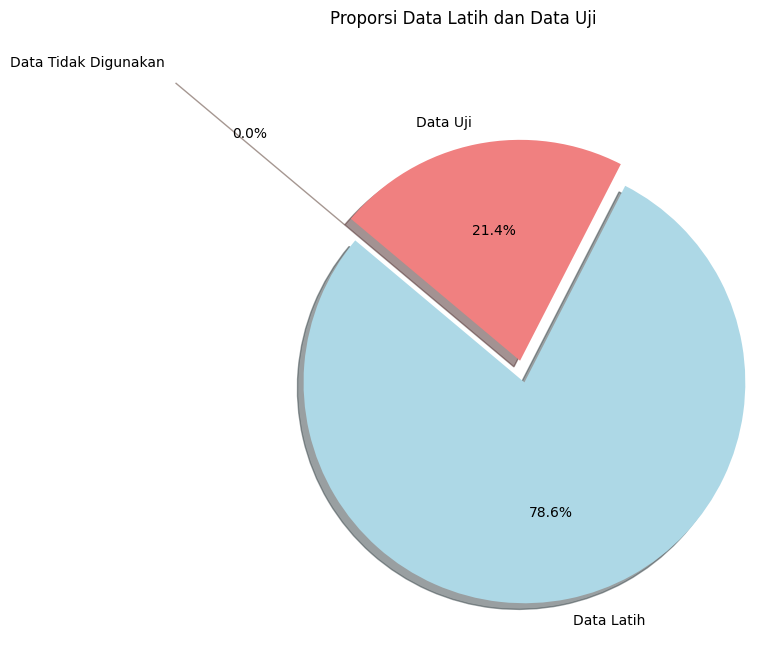

Accuracy: 1.0


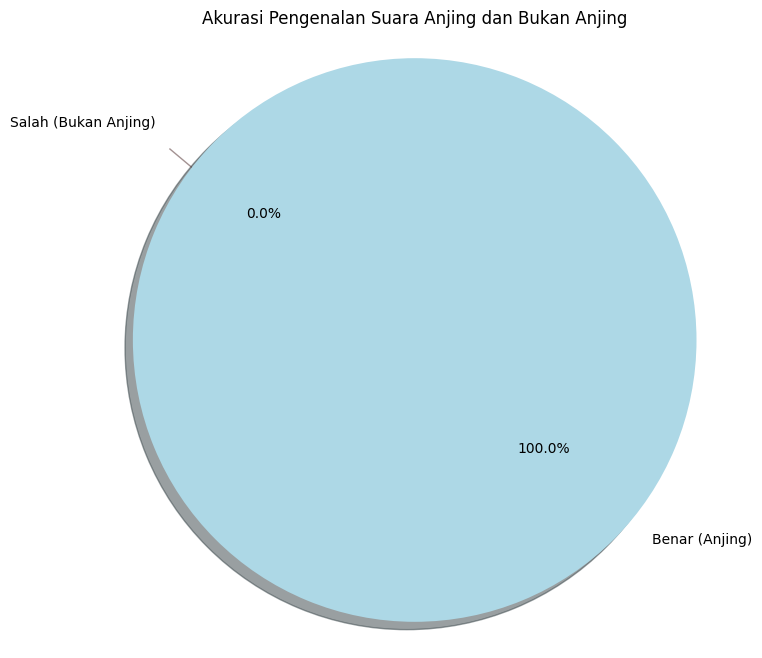

Jumlah data latih: 22
Jumlah data uji: 6


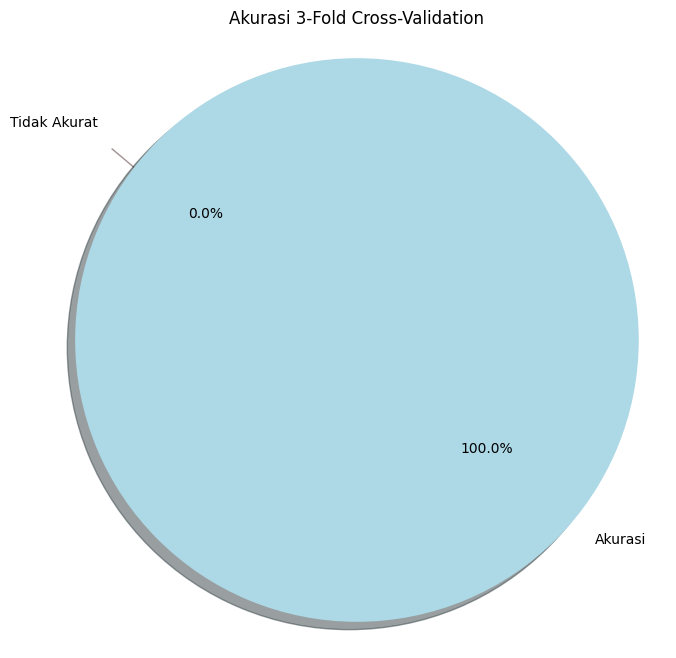

In [86]:
import numpy as np
import librosa
import os
from scipy.fftpack import dct
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames, hop_length, frame_length  # Return hop_length and frame_length along with frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Function to perform Fast Fourier Transform (FFT)
def perform_fft(frames):
    return np.fft.fft(frames, axis=0)

# Function to perform Discrete Cosine Transform (DCT)
def perform_dct(log_power_spectrum, num_mfcc=13):
    return dct(log_power_spectrum, type=2, axis=0, norm='ortho')

# Function to perform cepstral liftering
def cepstral_liftering(mfcc, lifter_coeff=22):
    num_frames, num_coeffs = mfcc.shape
    n = np.arange(num_coeffs)
    lift = 1 + (lifter_coeff / 2) * np.sin(np.pi * n / lifter_coeff)
    return mfcc * lift

# Collecting the data for classification
X = []
y = []

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames, hop_length, frame_length = frame_blocking(pre_emphasized_audio)

        # Windowing
        windowed_frames = apply_window(frames)

        # Fast Fourier Transform (FFT)
        fft_result = perform_fft(windowed_frames)

        # Power Spectrum
        power_spectrum = np.abs(fft_result)**2

        # Log Power Spectrum
        log_power_spectrum = np.log(power_spectrum)

        # Discrete Cosine Transform (DCT)
        num_mfcc = 13  # Number of MFCC coefficients
        mfcc = perform_dct(log_power_spectrum, num_mfcc=num_mfcc)

        # Cepstral Liftering
        lifter_coeff = 22  # Liftering coefficient
        mfcc_liftered = cepstral_liftering(mfcc, lifter_coeff=lifter_coeff)

        # Append MFCC coefficients to X
        X.append(mfcc_liftered)
        # Append class label to y (Assuming the file name format is "<class_label>_<some_id>.wav")
        class_label = file_name.split("_")[0]
        if class_label == 'anjing':
            y.append(1)  # 1 for class 'anjing'
        else:
            y.append(0)  # 0 for class 'bukan anjing'



# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Visualize the proportion of data in training and testing sets
num_data = len(y)
num_train_data = len(y_train)
num_test_data = len(y_test)

labels = ['Data Latih', 'Data Uji', 'Data Tidak Digunakan']
sizes = [num_train_data, num_test_data, num_data - num_train_data - num_test_data]
colors = ['lightblue', 'lightcoral', 'lightsalmon']
explode = (0.1, 0, 1)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporsi Data Latih dan Data Uji')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

# Visualize accuracy in a pie chart
labels = ['Benar (Anjing)', 'Salah (Bukan Anjing)']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Akurasi Pengenalan Suara Anjing dan Bukan Anjing')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
# ... Kodingan sebelumnya untuk ekstraksi fitur MFCC dan pembentukan dataset ...

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Calculate the number of data in training and testing sets
num_train_data = len(y_train)
num_test_data = len(y_test)

# Print the number of data in training and testing sets
print("Jumlah data latih:", num_train_data)
print("Jumlah data uji:", num_test_data)





# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Create the Decision Tree model
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
num_folds = 3

# Perform 3-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X_flattened, y, cv=kf)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(accuracy_scores)

# Calculate accuracy in percentage
accuracy_percentage = mean_accuracy * 100

# Visualize accuracy in a pie chart
labels = ['Akurasi', 'Tidak Akurat']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Akurasi 3-Fold Cross-Validation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#penjelasan dari kodingan ini cari

Accuracy: 1.0


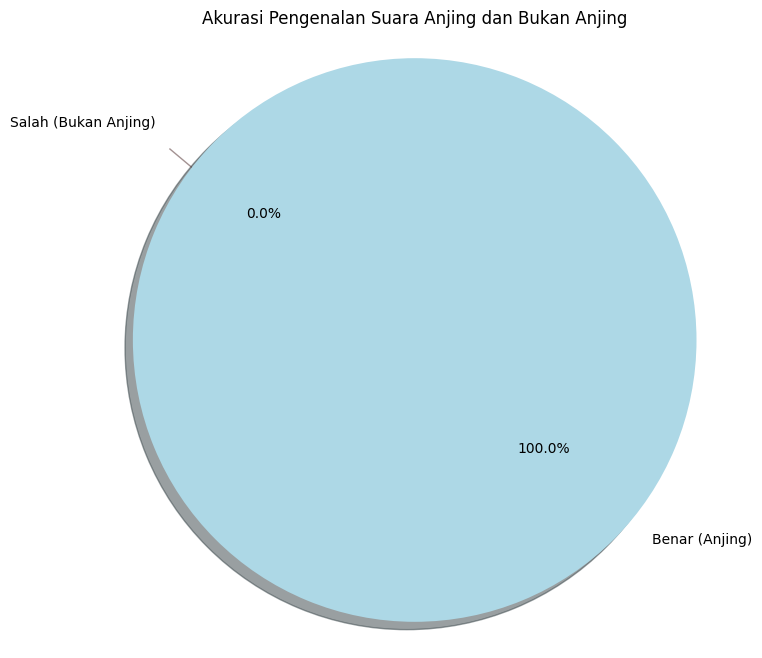

Jumlah data latih: 22
Jumlah data uji: 6


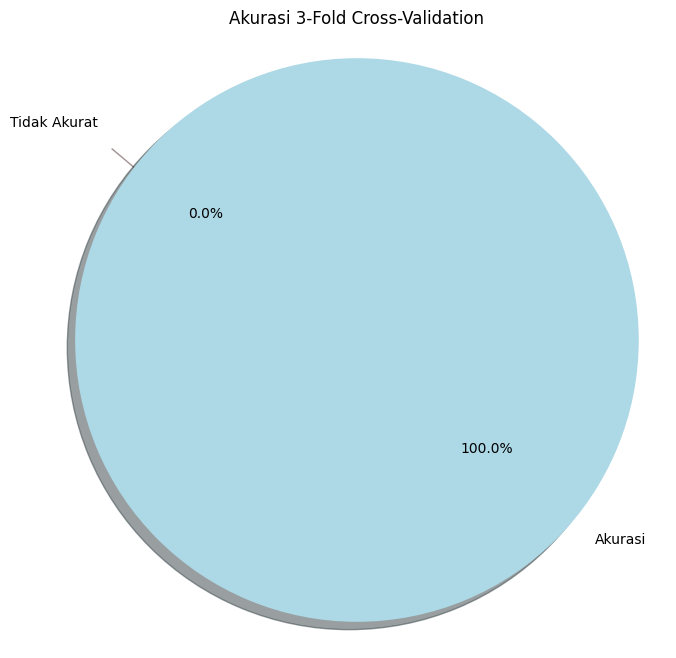

In [80]:
import numpy as np
import librosa
import os
from scipy.fftpack import dct
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames, hop_length, frame_length  # Return hop_length and frame_length along with frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Function to perform Fast Fourier Transform (FFT)
def perform_fft(frames):
    return np.fft.fft(frames, axis=0)

# Function to perform Discrete Cosine Transform (DCT)
def perform_dct(log_power_spectrum, num_mfcc=13):
    return dct(log_power_spectrum, type=2, axis=0, norm='ortho')

# Function to perform cepstral liftering
def cepstral_liftering(mfcc, lifter_coeff=22):
    num_frames, num_coeffs = mfcc.shape
    n = np.arange(num_coeffs)
    lift = 1 + (lifter_coeff / 2) * np.sin(np.pi * n / lifter_coeff)
    return mfcc * lift

# Function to extract MFCC coefficients
def extract_mfcc(log_power_spectrum, num_mfcc=13, lifter_coeff=22):
    mfcc = perform_dct(log_power_spectrum, num_mfcc=num_mfcc)
    mfcc_liftered = cepstral_liftering(mfcc, lifter_coeff=lifter_coeff)
    return mfcc_liftered

# Collecting the data for classification
X = []
y = []

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames, hop_length, frame_length = frame_blocking(pre_emphasized_audio)

        # Windowing
        windowed_frames = apply_window(frames)

        # Fast Fourier Transform (FFT)
        fft_result = perform_fft(windowed_frames)

        # Power Spectrum
        power_spectrum = np.abs(fft_result)**2

        # Log Power Spectrum
        log_power_spectrum = np.log(power_spectrum)

        # Extract MFCC coefficients
        num_mfcc = 13  # Number of MFCC coefficients
        lifter_coeff = 22  # Liftering coefficient
        mfcc_liftered = extract_mfcc(log_power_spectrum, num_mfcc=num_mfcc, lifter_coeff=lifter_coeff)

        # Append MFCC coefficients to X
        X.append(mfcc_liftered)
        # Append class label to y (Assuming the file name format is "<class_label>_<some_id>.wav")
        class_label = file_name.split("_")[0]
        if class_label == 'anjing':
            y.append(1)  # 1 for class 'anjing'
        else:
            y.append(0)  # 0 for class 'bukan anjing'

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

# Visualize accuracy in a pie chart
labels = ['Benar (Anjing)', 'Salah (Bukan Anjing)']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Akurasi Pengenalan Suara Anjing dan Bukan Anjing')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# ... Kodingan sebelumnya untuk ekstraksi fitur MFCC dan pembentukan dataset ...

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Calculate the number of data in training and testing sets
num_train_data = len(y_train)
num_test_data = len(y_test)

# Print the number of data in training and testing sets
print("Jumlah data latih:", num_train_data)
print("Jumlah data uji:", num_test_data)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Create the Decision Tree model
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
num_folds = 3

# Perform 3-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X_flattened, y, cv=kf)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(accuracy_scores)

# Calculate accuracy in percentage
accuracy_percentage = mean_accuracy * 100

# Visualize accuracy in a pie chart
labels = ['Akurasi', 'Tidak Akurat']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Akurasi 3-Fold Cross-Validation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Accuracy for each fold: [1. 1. 1.]
Average accuracy: 1.0


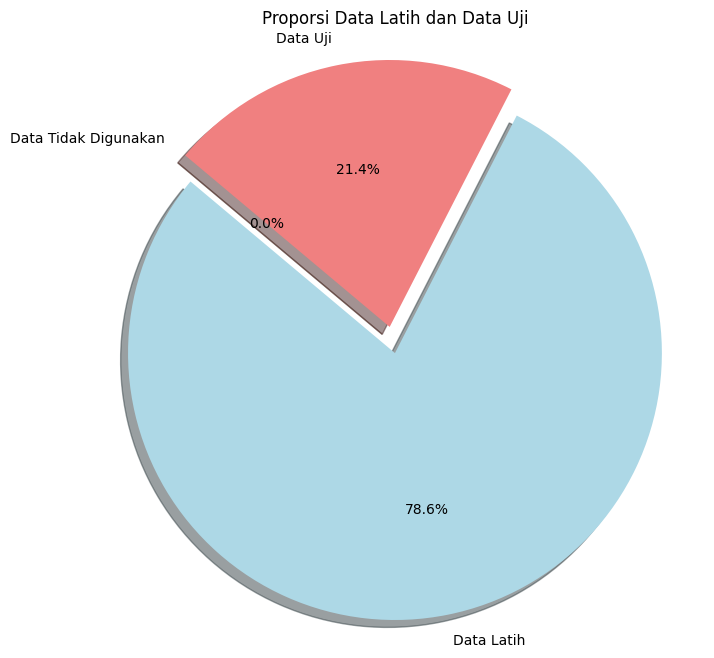

Jumlah data latih: 22
Jumlah data uji: 6


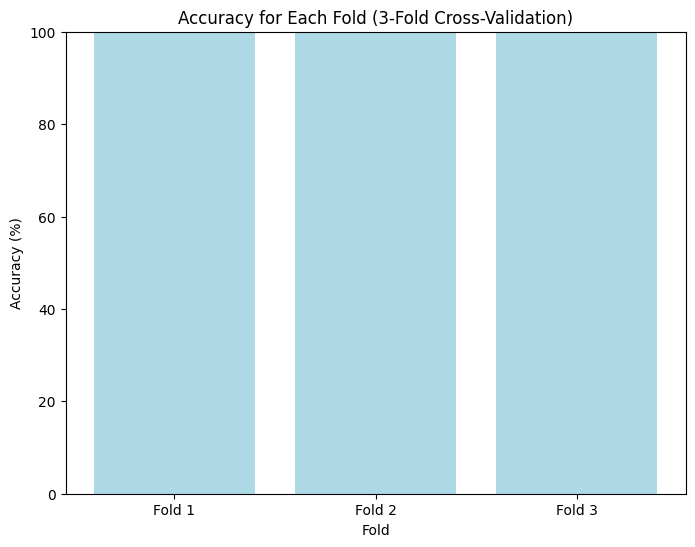

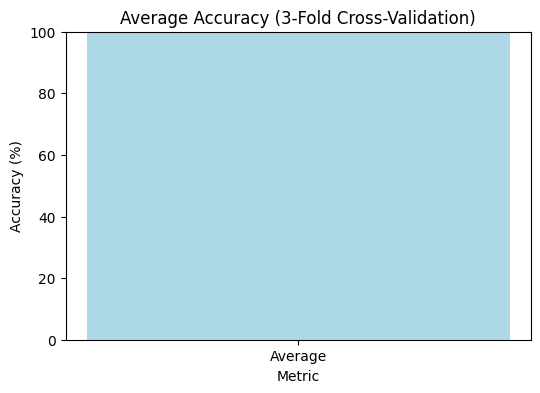

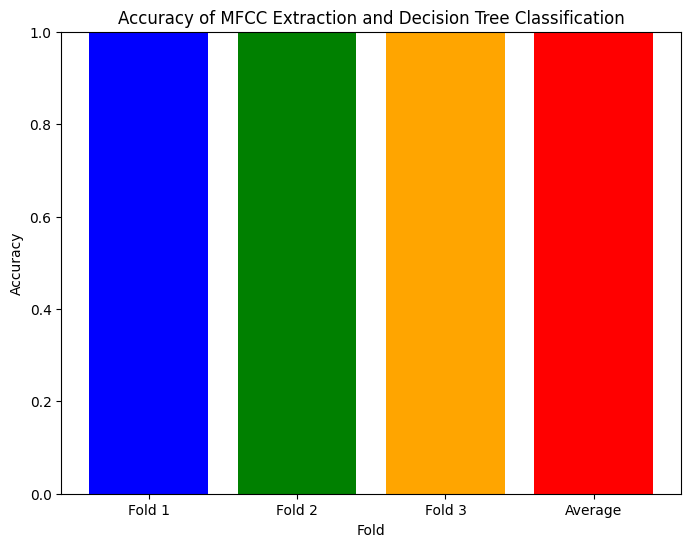

In [76]:
import numpy as np
import librosa
import os
from scipy.fftpack import dct
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'
audio_files = os.listdir(folder_path)

# Function to perform pre-emphasis
def pre_emphasis(audio, coef=0.97):
    return np.append(audio[0], audio[1:] - coef * audio[:-1])

# Function to perform frame blocking
def frame_blocking(audio, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length, axis=0).copy()
    return frames, hop_length, frame_length  # Return hop_length and frame_length along with frames

# Function to perform windowing
def apply_window(frames, window_type='hamming'):
    window = librosa.filters.get_window(window_type, frames.shape[0], fftbins=True)
    return frames * window[:, np.newaxis]

# Function to perform Fast Fourier Transform (FFT)
def perform_fft(frames):
    return np.fft.fft(frames, axis=0)

# Function to perform Discrete Cosine Transform (DCT)
def perform_dct(log_power_spectrum, num_mfcc=13):
    return dct(log_power_spectrum, type=2, axis=0, norm='ortho')

# Function to perform cepstral liftering
def cepstral_liftering(mfcc, lifter_coeff=22):
    num_frames, num_coeffs = mfcc.shape
    n = np.arange(num_coeffs)
    lift = 1 + (lifter_coeff / 2) * np.sin(np.pi * n / lifter_coeff)
    return mfcc * lift

# Collecting the data for classification
X = []
y = []

# Process each audio file
for file_name in audio_files:
    if file_name.endswith('.wav'):
        audio_file = os.path.join(folder_path, file_name)
        # Load audio file
        audio, sr = librosa.load(audio_file)

        # Pre-emphasis
        pre_emphasized_audio = pre_emphasis(audio)

        # Frame blocking
        frames, hop_length, frame_length = frame_blocking(pre_emphasized_audio)

        # Windowing
        windowed_frames = apply_window(frames)

        # Fast Fourier Transform (FFT)
        fft_result = perform_fft(windowed_frames)

        # Power Spectrum
        power_spectrum = np.abs(fft_result)**2

        # Log Power Spectrum
        log_power_spectrum = np.log(power_spectrum)

        # Discrete Cosine Transform (DCT)
        num_mfcc = 13  # Number of MFCC coefficients
        mfcc = perform_dct(log_power_spectrum, num_mfcc=num_mfcc)

        # Cepstral Liftering
        lifter_coeff = 22  # Liftering coefficient
        mfcc_liftered = cepstral_liftering(mfcc, lifter_coeff=lifter_coeff)

        # Append MFCC coefficients to X
        X.append(mfcc_liftered)
        # Append class label to y (Assuming the file name format is "<class_label>_<some_id>.wav")
        class_label = file_name.split("_")[0]
        if class_label == 'anjing':
            y.append(1)  # 1 for class 'anjing'
        else:
            y.append(0)  # 0 for class 'bukan anjing'

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Perform 3-fold cross-validation
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X_flattened, y, cv=3)
average_accuracy = np.mean(cv_scores)

print("Accuracy for each fold:", cv_scores)
print("Average accuracy:", average_accuracy)

# Visualize the proportion of data in training and testing sets
num_data = len(y)
num_train_data = len(y_train)
num_test_data = len(y_test)

labels = ['Data Latih', 'Data Uji', 'Data Tidak Digunakan']
sizes = [num_train_data, num_test_data, num_data - num_train_data - num_test_data]
colors = ['lightblue', 'lightcoral', 'lightsalmon']
explode = (0.1, 0, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporsi Data Latih dan Data Uji')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the number of data in training and testing sets
print("Jumlah data latih:", num_train_data)
print("Jumlah data uji:", num_test_data)




# Perform 3-fold cross-validation
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X_flattened, y, cv=3)
average_accuracy = np.mean(cv_scores)

# Visualize accuracy for each fold
fold_labels = ['Fold 1', 'Fold 2', 'Fold 3']
fold_accuracy = cv_scores * 100
plt.figure(figsize=(8, 6))
plt.bar(fold_labels, fold_accuracy, color='lightblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Fold (3-Fold Cross-Validation)')
plt.ylim(0, 100)
plt.show()

# Visualize average accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Average'], [average_accuracy * 100], color='lightblue')
plt.xlabel('Metric')
plt.ylabel('Accuracy (%)')
plt.title('Average Accuracy (3-Fold Cross-Validation)')
plt.ylim(0, 100)
plt.show()

# Perform 3-fold cross-validation
clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X_flattened, y, cv=3)
average_accuracy = np.mean(cv_scores)

# Visualize the accuracy for each fold and average accuracy
fold_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Average']
accuracy_values = np.append(cv_scores, average_accuracy)

plt.figure(figsize=(8, 6))
plt.bar(fold_labels, accuracy_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of MFCC Extraction and Decision Tree Classification')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()




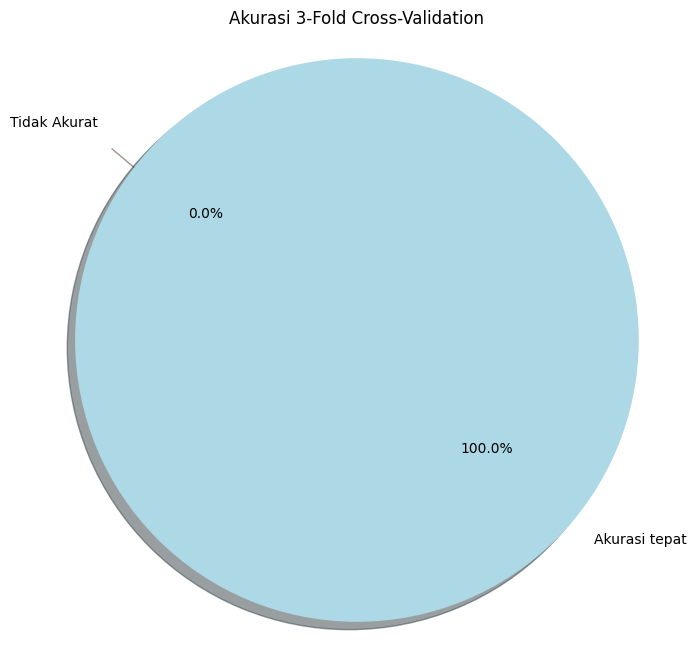

In [78]:
import matplotlib.pyplot as plt

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the MFCC coefficients
X_flattened = X.reshape(X.shape[0], -1)

# Create the Decision Tree model
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
num_folds = 3

# Perform 3-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X_flattened, y, cv=kf)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(accuracy_scores)

# Calculate accuracy in percentage
accuracy_percentage = mean_accuracy * 100

# Visualize accuracy in a pie chart
labels = ['Akurasi tepat', 'Tidak Akurat']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Akurasi 3-Fold Cross-Validation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **FFT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found at the specified path:", folder_path)
else:
    # Get the list of files in the folder
    files_in_folder = os.listdir(folder_path)

    # Define the destination path in Google Colab
    destination_path = '/content/'

    # Upload audio files to Google Colab
    for file_name in files_in_folder:
        source_file_path = os.path.join(folder_path, file_name)
        destination_file_path = os.path.join(destination_path, file_name)
        shutil.copyfile(source_file_path, destination_file_path)
        print(f"File '{file_name}' successfully uploaded to Google Colab.")

        # Read the audio file
        sample_rate, audio_data = wavfile.read(destination_file_path)

        # Perform FFT
        fft_result = np.fft.fft(audio_data)
        frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)

        # Plot the frequency domain representation of the audio signal
        plt.figure(figsize=(10, 4))
        plt.plot(frequencies, np.abs(fft_result))
        plt.title(f"FFT of {file_name}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.show()




### **PAKE HISTOGRAM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found at the specified path:", folder_path)
else:
    # Get the list of files in the folder
    files_in_folder = os.listdir(folder_path)

    # Define the destination path in Google Colab
    destination_path = '/content/'

    # Upload audio files to Google Colab
    for file_name in files_in_folder:
        source_file_path = os.path.join(folder_path, file_name)
        destination_file_path = os.path.join(destination_path, file_name)
        shutil.copyfile(source_file_path, destination_file_path)
        print(f"File '{file_name}' successfully uploaded to Google Colab.")

        # Read the audio file
        sample_rate, audio_data = wavfile.read(destination_file_path)

        # Perform FFT
        fft_result = np.fft.fft(audio_data)
        frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)

        # Plot the histogram of the frequency domain representation
        plt.figure(figsize=(10, 4))
        plt.hist(np.abs(fft_result), bins=100, color='blue', alpha=0.7)
        plt.title(f"Histogram of FFT of {file_name}")
        plt.xlabel("Magnitude")
        plt.ylabel("Frequency Count")
        plt.show()


## **MEL FILTER BLANK**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found at the specified path:", folder_path)
else:
    # Get the list of files in the folder
    files_in_folder = os.listdir(folder_path)

    # Define the destination path in Google Colab
    destination_path = '/content/'

    # Upload audio files to Google Colab
    for file_name in files_in_folder:
        source_file_path = os.path.join(folder_path, file_name)
        destination_file_path = os.path.join(destination_path, file_name)
        shutil.copyfile(source_file_path, destination_file_path)
        print(f"File '{file_name}' successfully uploaded to Google Colab.")

        # Read the audio file
        sample_rate, audio_data = wavfile.read(destination_file_path)

        # Perform FFT
        fft_result = np.fft.fft(audio_data)
        frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)

        # Mel Filter Bank
        def mel_filter_bank(num_filters, fft_size, sample_rate):
            # Create Mel filter bank
            mel_filter_bank = np.zeros((num_filters, fft_size // 2 + 1))

            # Define Mel scale points (equally spaced in Mel scale)
            mel_points = np.linspace(0, hz_to_mel(sample_rate // 2), num_filters + 2)

            # Convert Mel points to Hz
            hz_points = mel_to_hz(mel_points)

            for i in range(1, num_filters + 1):
                # Calculate lower, center, and upper frequencies of each Mel filter
                lower = hz_points[i - 1]
                center = hz_points[i]
                upper = hz_points[i + 1]

                # Calculate the index position in the FFT of each frequency
                lower_index = int(np.floor(lower / sample_rate * (fft_size + 1)))
                center_index = int(np.floor(center / sample_rate * (fft_size + 1)))
                upper_index = int(np.floor(upper / sample_rate * (fft_size + 1)))

                # Create triangular filter
                mel_filter_bank[i - 1, lower_index:center_index] = (np.arange(lower_index, center_index) - lower_index) / (center_index - lower_index)
                mel_filter_bank[i - 1, center_index:upper_index] = 1 - ((np.arange(center_index, upper_index) - center_index) / (upper_index - center_index))

            return mel_filter_bank

        # Convert frequency in Hz to Mel scale
        def hz_to_mel(hz):
            return 2595 * np.log10(1 + hz / 700)

        # Convert frequency in Mel scale to Hz
        def mel_to_hz(mel):
            return 700 * (10 ** (mel / 2595) - 1)

        # Number of Mel filter banks
        num_filters = 26

        # Size of FFT
        fft_size = 2048

        # Calculate Mel filter bank
        mel_filter_bank = mel_filter_bank(num_filters, fft_size, sample_rate)

        # Apply Mel filter bank to the FFT result
        mel_spectrum = np.dot(mel_filter_bank, np.abs(fft_result[:fft_size // 2 + 1]))

        # Plot the Mel frequency spectrum
        plt.figure(figsize=(10, 4))
        plt.plot(np.linspace(0, sample_rate // 2, len(mel_spectrum)), mel_spectrum)
        plt.title(f"Mel Frequency Spectrum of {file_name}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()


### **Mel Frequency Wrapping**

In [ ]:
!pip install librosa


In [ ]:
from google.colab import drive
import os
import shutil
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path in Google Drive where the audio WAV files are located
folder_path = '/content/drive/MyDrive/Hasil Potongan Audio'

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found at the specified path:", folder_path)
else:
    # Get the list of files in the folder
    files_in_folder = os.listdir(folder_path)

    # Define the destination path in Google Colab
    destination_path = '/content/'

    # Upload audio files to Google Colab
    for file_name in files_in_folder:
        source_file_path = os.path.join(folder_path, file_name)
        destination_file_path = os.path.join(destination_path, file_name)
        shutil.copyfile(source_file_path, destination_file_path)
        print(f"File '{file_name}' successfully uploaded to Google Colab.")

        # Load the audio file using librosa
        audio_data, sampling_rate = librosa.load(destination_file_path)

        # Perform Mel Frequency Wrapping (MFCC calculation)
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)

        # Display the MFCCs as an image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
        plt.tight_layout()
        plt.show()
